In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx
import torch
import pandas as pd
from scipy import linalg

In [ ]:
pip install --upgrade networkx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = nx.read_gml('/content/drive/My Drive/netscience.gml')

Mounted at /content/drive


In [ ]:
#data.nodes()

In [ ]:
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(data, seed=42)

# nx.draw(data, pos, with_labels=False, node_size=10)
# plt.title("Network Visualization")
# plt.axis('off')
# plt.show()

Spectral Analysis:
Spectral analysis is a broader term that refers to the study of a system in terms of its spectral (frequency) properties.
In the context of network science, spectral analysis involves analyzing the eigenvalues and eigenvectors of matrices associated with a network, such as the Laplacian matrix or the adjacency matrix.
Spectral analysis can be used for various purposes, including community detection, understanding network dynamics, and identifying structural properties of networks.

Inertia (K-Means): 3.2523430780976805


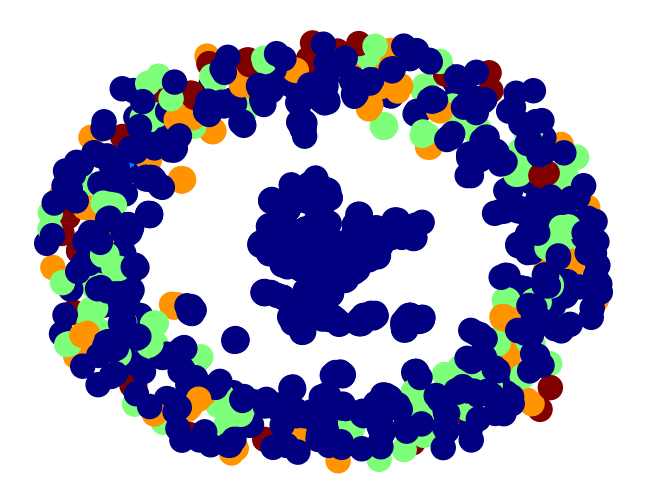

In [ ]:
###Spectral Analysis through K-means clustering

import networkx as nx
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'data' is your graph
adjacency_matrix = nx.to_numpy_array(data)
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Use the eigenvectors for spectral clustering
k = 5  # Number of clusters
embedding = eigenvectors[:, :k]

# Apply k-means clustering
kmeans = KMeans(n_clusters=k , n_init=20)  # Set n_init explicitly)
labels = kmeans.fit_predict(embedding)

kmeans_inertia = kmeans.inertia_
print("Inertia (K-Means):", kmeans_inertia)


# Visualize the graph with nodes colored by cluster
pos = nx.spring_layout(data)
nx.draw(data, pos, node_color=labels, with_labels=False, cmap=plt.cm.jet)
plt.show()


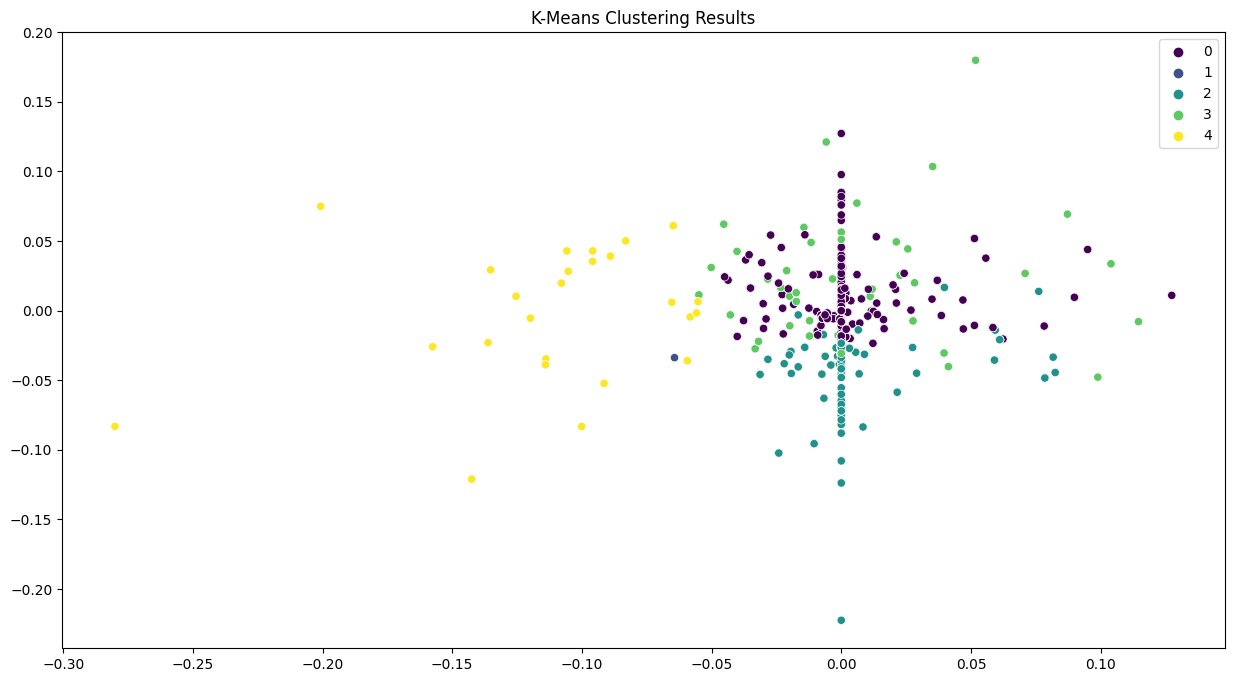

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'embedding' is the spectral embedding and 'labels_kmeans', 'labels_spectral' are cluster labels
plt.figure(figsize=(15, 8))

# K-means clustering
# plt.subplot(1, 2, 1)
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette='viridis', legend='full')
plt.title('K-Means Clustering Results')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

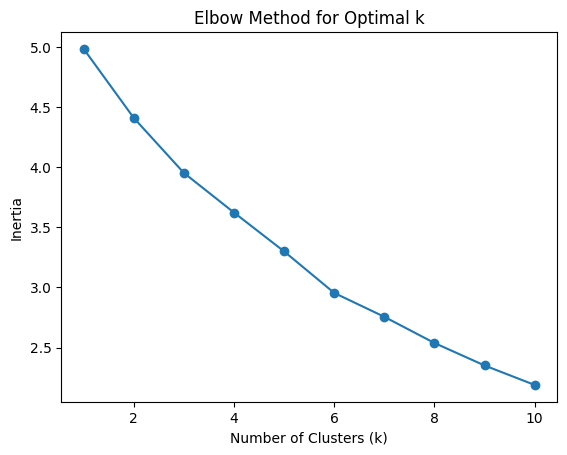

In [ ]:
# Assuming k_values is a list of potential values for k
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embedding)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values for different k
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The inertia value, in the context of k-means clustering, represents the sum of squared distances between data points and their assigned cluster centers. It provides an indication of how compact the clusters are. A lower inertia value is generally preferred, as it suggests tighter and more well-defined clusters.

Lower Inertia: Indicates that the clusters are more compact and points within each cluster are closer to their cluster center. This is desirable for a good clustering solution.

Higher Inertia: Suggests that the clusters are more spread out, and points within each cluster are farther from their cluster center. This could indicate that the algorithm is struggling to find tight, well-separated clusters.

In practical terms, when using k-means clustering, you might want to experiment with different values of k (number of clusters) and observe how the inertia changes. A common approach is to use the "elbow method," where you plot the inertia for different values of k and look for an "elbow" point where further increasing k doesn't lead to a significant decrease in inertia. This point is often considered a good choice for the number of clusters.

Eigenvalues:
[-9.22971263e-15 -6.69747110e-15 -5.88850194e-15 ...  2.80521491e+01
  2.81799417e+01  3.50501263e+01]


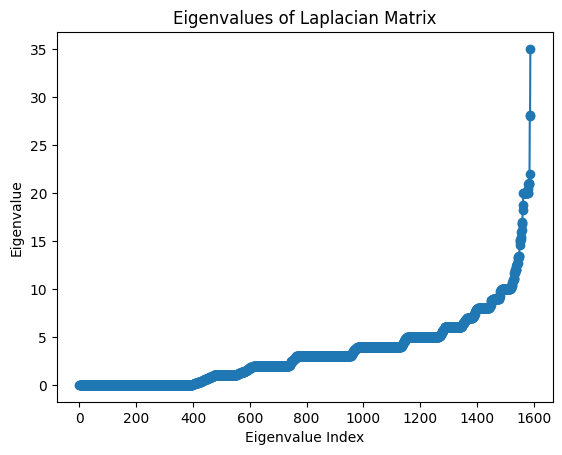

In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your graph
adjacency_matrix = nx.to_numpy_array(data)
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Visualize the eigenvalues
plt.plot(eigenvalues, marker='o')
plt.title('Eigenvalues of Laplacian Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()



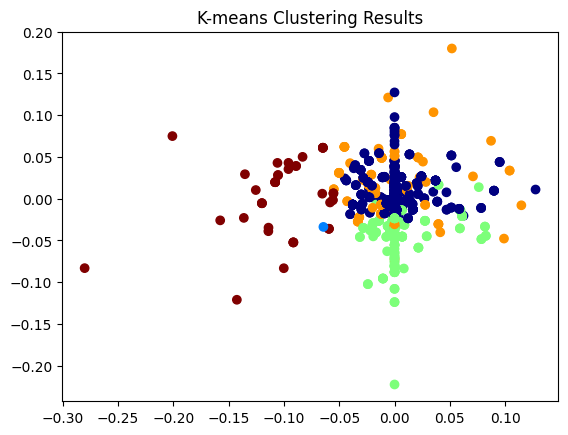

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap=plt.cm.jet)
plt.title('K-means Clustering Results')
plt.show()

The scatter plot visualizes the data points in a two-dimensional space defined by the first two principal components, with each point colored according to its cluster assignment. This kind of plot can help you visually assess the separation of clusters in the reduced-dimensional space.

embedding[:, 0] represents the values of the first principal component (eigenvector) obtained from the spectral decomposition. This is the x-axis of your scatter plot.

embedding[:, 1] represents the values of the second principal component obtained from the spectral decomposition. This is the y-axis of your scatter plot.

c=labels specifies the color of each point based on the cluster assignment obtained from spectral clustering.

cmap=plt.cm.jet specifies the color map used for mapping cluster labels to colors.







In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(embedding, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4422519764490167


Silhouette Score: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates a better-defined clustering solution.

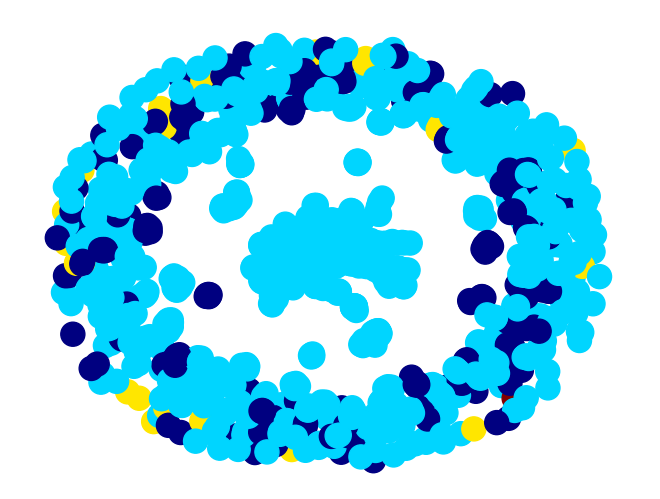

In [ ]:
###Spectral Analysis through Agglomerative Clustering

import networkx as nx
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Use data in your graph
adjacency_matrix = nx.to_numpy_array(data)
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Use the eigenvectors for spectral clustering
k = 4  # Number of clusters
embedding1 = eigenvectors[:, :k]

# Assuming 'embedding' is the spectral embedding
clustering = AgglomerativeClustering(n_clusters=k)
labels1 = clustering.fit_predict(embedding1)


# Visualize the graph with nodes colored by cluster
pos = nx.spring_layout(data)
nx.draw(data, pos, node_color=labels1, with_labels=False, cmap=plt.cm.jet)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(embedding1, labels1)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4041278641049083


The Silhouette Score is a metric used to calculate the goodness of a clustering technique, indicating how well-separated the clusters are. The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

A Silhouette Score of 0.42 is generally considered good. Here's a rough interpretation:

If the score is close to 1, it indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, suggesting a good separation of clusters.
If the score is around 0, it suggests overlapping clusters, where an object is on or very close to the decision boundary between two neighboring clusters.
If the score is close to -1, it indicates that the object may be assigned to the wrong cluster.
In case, 0.42 is a relatively high score, suggesting good separation between clusters.

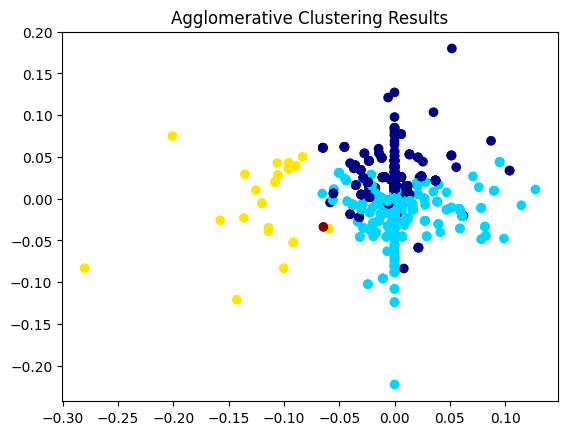

In [ ]:
plt.scatter(embedding1[:, 0], embedding1[:, 1], c=labels1, cmap=plt.cm.jet)
plt.title('Agglomerative Clustering Results')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


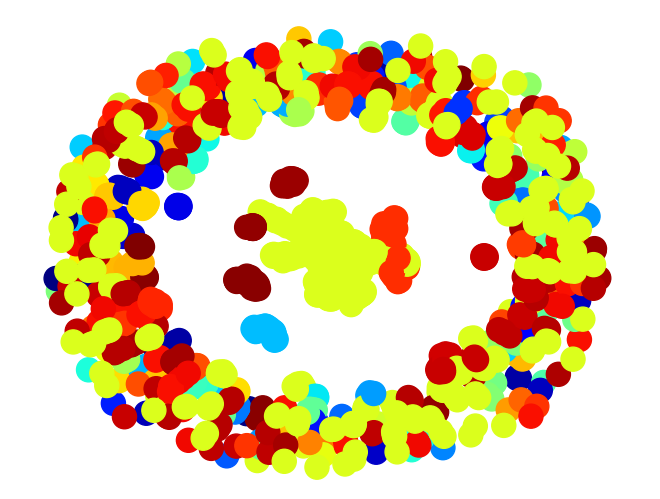

In [ ]:
###Spectral Analysis through Affinity Propagation:

import networkx as nx
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AffinityPropagation

# Assuming 'data' is your graph
adjacency_matrix = nx.to_numpy_array(data)
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Use the eigenvectors for spectral clustering
k = 4  # Number of clusters
embedding2 = eigenvectors[:, :k]

# Assuming 'embedding' is the spectral embedding
clustering = AffinityPropagation(damping=0.9, max_iter=1000)
labels2 = clustering.fit_predict(embedding2)


# Visualize the graph with nodes colored by cluster
pos = nx.spring_layout(data)
nx.draw(data, pos, node_color=labels2, with_labels=False, cmap=plt.cm.jet)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(embedding2, labels2)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6574551594600867


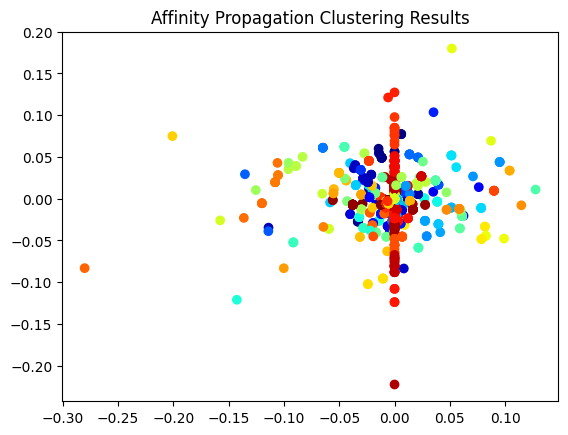

In [ ]:
plt.scatter(embedding2[:, 0], embedding2[:, 1], c=labels2, cmap=plt.cm.jet)
plt.title('Affinity Propagation Clustering Results')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


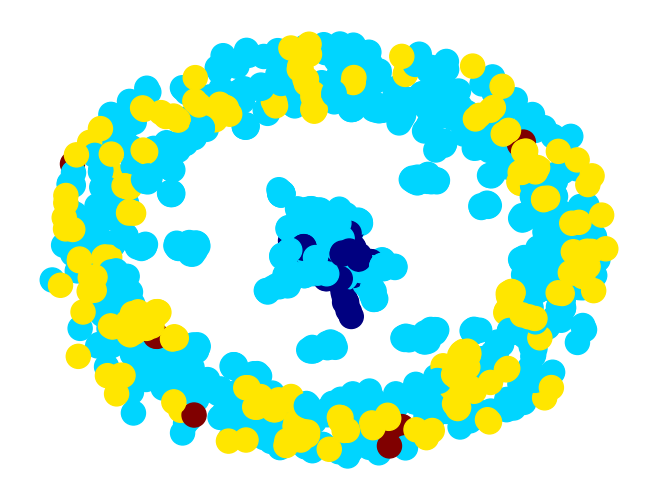

In [ ]:
###Spectral Analysis through Spectral Clustering:


from sklearn.cluster import SpectralClustering
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your graph
adjacency_matrix = nx.to_numpy_array(data)
laplacian_matrix = np.diag(np.sum(adjacency_matrix, axis=1)) - adjacency_matrix

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

# Use the eigenvectors for spectral clustering
k = 4  # Number of clusters
embedding3 = eigenvectors[:, :k]

# Apply spectral clustering
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(embedding3)

# Visualize the graph with nodes colored by cluster
pos = nx.spring_layout(data)
nx.draw(data, pos, node_color=labels_spectral, with_labels=False, cmap=plt.cm.jet)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(embedding3, labels_spectral)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.228460422579114


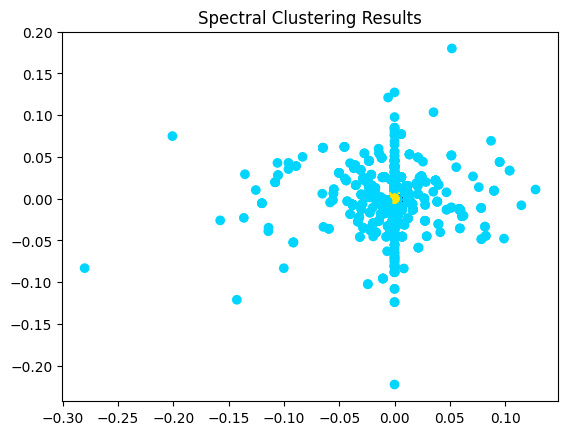

In [ ]:
plt.scatter(embedding3[:, 0], embedding3[:, 1], c=labels_spectral, cmap=plt.cm.jet)
plt.title('Spectral Clustering Results')
plt.show()

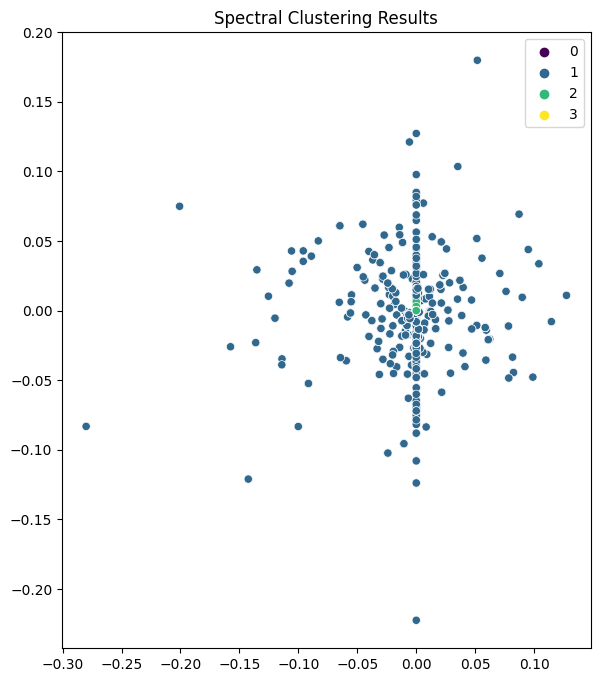

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'embedding' is the spectral embedding and 'labels_kmeans', 'labels_spectral' are cluster labels
plt.figure(figsize=(15, 8))

# Spectral clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=embedding3[:, 0], y=embedding3[:, 1], hue=labels_spectral, palette='viridis', legend='full')
plt.title('Spectral Clustering Results')

plt.show()